# 군집화

## 수평 군집화
### K평균

In [18]:
from IPython.display import display, Image

In [19]:
import os
import scipy as sp
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans

from utils import CHART_DIR

seed = 2
sp.random.seed(seed)  # to reproduce the data later on

num_clusters = 3

In [20]:
def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab

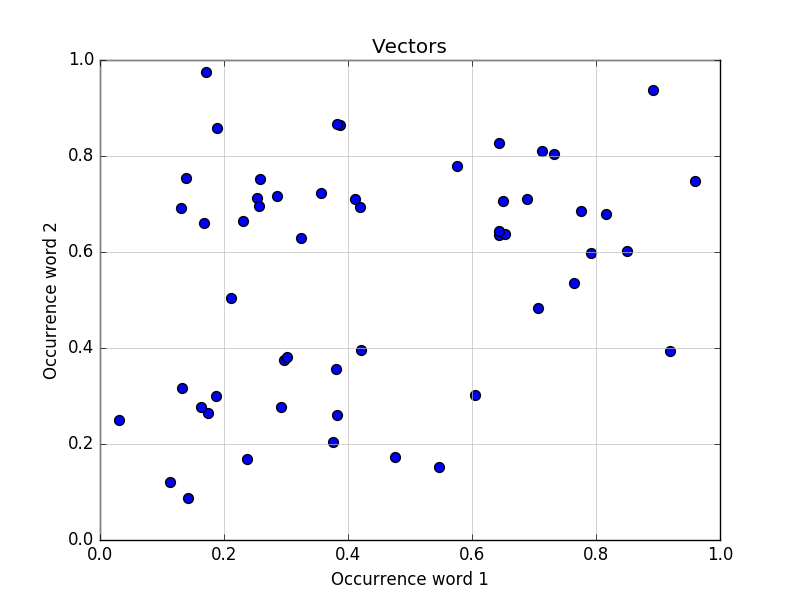

In [21]:
# 데이터 생성 (loc : 평균, scale : 표준편차)
xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

i = 1
plot_clustering(x, y, "Vectors")
pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
pylab.clf()

display(Image(filename='charts/1400_03_01.png'))

In [22]:
i += 1

# 1 iteration ####################

# 0부터 1까지 0.001의 차이를 가지는 배열을 생성하고 행렬 좌표로 변환
mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

In [23]:
# 첫번째 Iteration
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Initialization complete
Iteration  0, inertia 4.749


KMeans(copy_x=True, init='random', max_iter=1, n_clusters=3, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=2, tol=0.0001,
    verbose=1)

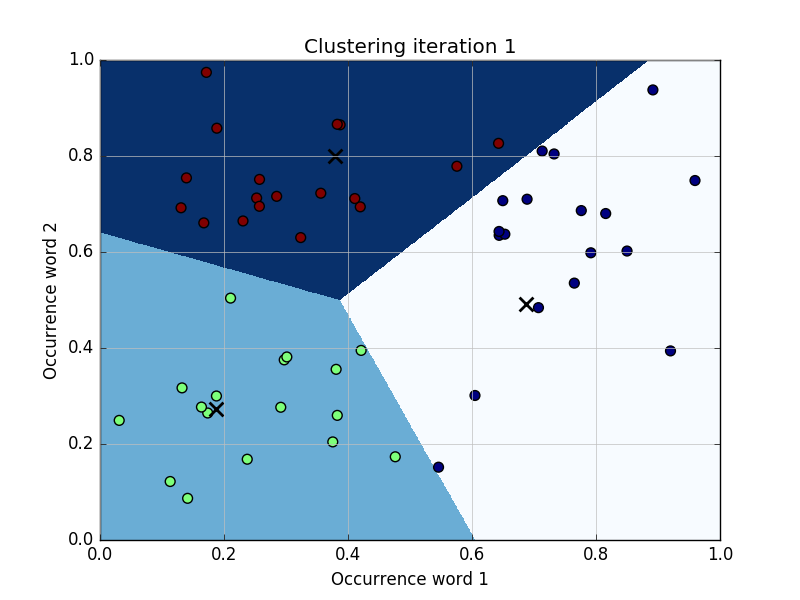

In [24]:
# 군집의 위치 좌표를 얻고 plot에 적용
Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
pylab.clf()

display(Image(filename='charts/1400_03_02.png'))

Initialization complete
Iteration  0, inertia 4.749
Iteration  1, inertia 3.379


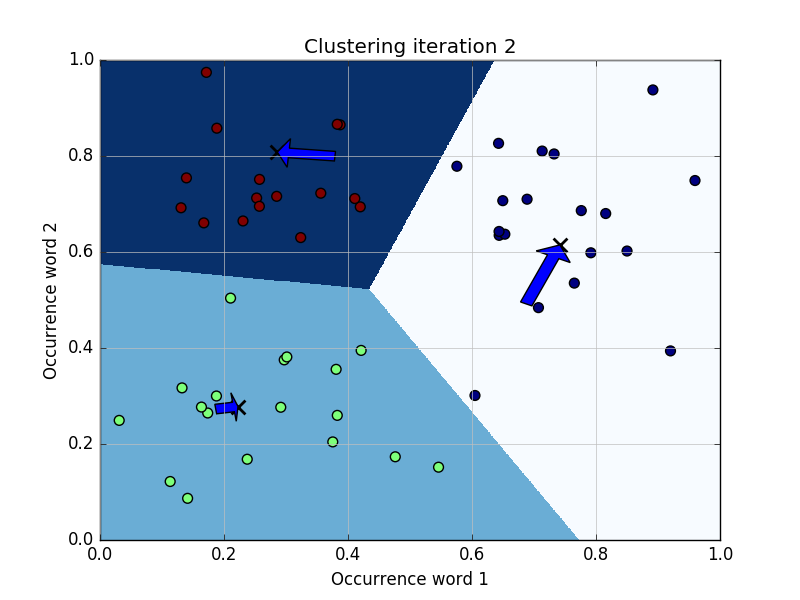

In [25]:
i += 1

# 2 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.gca().add_patch(
    pylab.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1))

pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
pylab.clf()

display(Image(filename='charts/1400_03_03.png'))

Initialization complete
Iteration  0, inertia 4.749
Iteration  1, inertia 3.379
Iteration  2, inertia 2.600
Iteration  3, inertia 2.497
Iteration  4, inertia 2.447
Converged at iteration 4


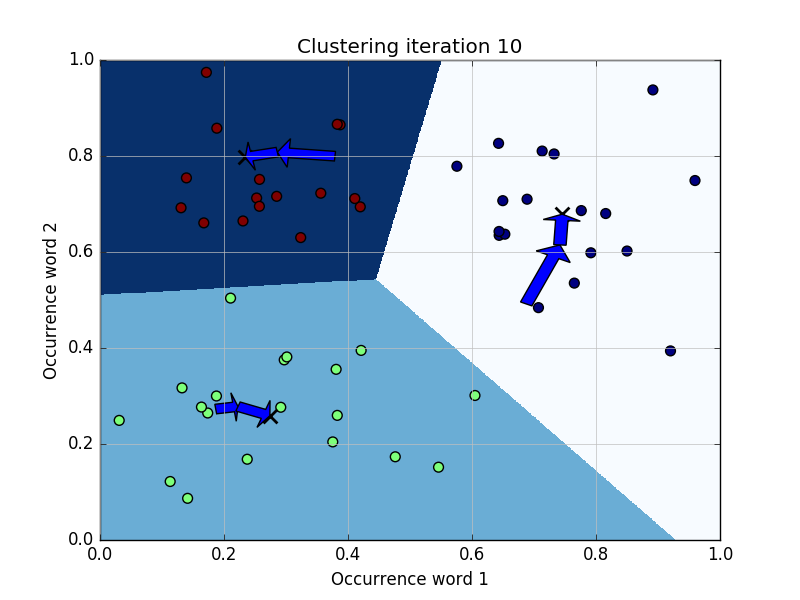

In [26]:
i += 1

# 3 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=10,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 10", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c3a, c3b, c3c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.gca().add_patch(
    pylab.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1))


pylab.gca().add_patch(
    pylab.Arrow(c2a[0], c2a[1], c3a[0] - c2a[0], c3a[1] - c2a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c2b[0], c2b[1], c3b[0] - c2b[0], c3b[1] - c2b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c2c[0], c2c[1], c3c[0] - c2c[0], c3c[1] - c2c[1], width=0.1))

pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
pylab.clf()

i += 1

display(Image(filename='charts/1400_03_04.png'))